## make ball and write numpy trajectory values

In [1]:
"""
# ipython_exit.py
Allows exit() to work if script is invoked with IPython without
raising NameError Exception. Keeps kernel alive.

Use: import variable 'exit' in target script with
     'from ipython_exit import exit'    
"""

import sys
from io import StringIO
from IPython import get_ipython


class IpyExit(SystemExit):
    """Exit Exception for IPython.

    Exception temporarily redirects stderr to buffer.
    """
    def __init__(self):
        # print("exiting")  # optionally print some message to stdout, too
        # ... or do other stuff before exit
        sys.stderr = StringIO()

    def __del__(self):
        sys.stderr.close()
        sys.stderr = sys.__stderr__  # restore from backup


def ipy_exit():
    raise IpyExit


if get_ipython():    # ...run with IPython
    exit = ipy_exit  # rebind to custom exit
else:
    exit = exit      # just make exit importable

In [ ]:
import vpython
from vpython import *

In [ ]:
# import vpython
# from vpython import *
# from vpython.no_notebook import stop_server
import time
# stop_server()
# from  vpython import * 
import random 
import numpy as np 
import json 
print('start') 
local_path = './data/txt/' 
json_file = 'custom_json.json' 
obj_file = f'{local_path}3dtr.obj'
np_file = f'{local_path}pointsNumpy1'

res_json = {} 
ball_id = 0 
total_frame = 0 
velocity = 0 
angle_degrees =0 
ball_initial_pos = 0 


# Define a function to carry out 1 animation frame. 
def animate(): 
  # Calcualte the force(s) on the ball. 
    grav = -ball.mass * gravity * yhat 
    relative_velocity = ball.velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    ball.force = grav + drag 
    # Calculate the ball's acceleration. 
    ball.acceleration = ball.force / ball.mass 
    # Update the ball's velocity. 
    ball.velocity = ball.velocity + ball.acceleration * dt 
    # Update the ball's position. 
    ball.pos = ball.pos + ball.velocity * dt 
    # Exit this function. 
    return drag, grav 
 
def animate2(): 
  # Calcualte the force(s) on the ball. 
    grav = -mass * gravity * yhat 
    relative_velocity = velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    force = grav + drag 
    # Calculate the ball's acceleration. 
    acceleration = force / mass 
    # Update the ball's velocity. 
    velocity = velocity + acceleration * dt 
    # Update the ball's position. 
    pos = pos + velocity * dt 
    # Exit this function. 
    return drag, grav 

drag_coeff = 15 
 
head_wind_x = -8  # -4 
head_wind_y = 0 
head_wind_z = 1  # 4 
head_wind = vector(head_wind_x,head_wind_y,head_wind_z) 
################################################################ 
# Create a ball. 
ball = sphere(make_trail=True,radius=0.5, color=color.yellow) 
ground = box(pos=vector(0,0,0), size=vector(450,0.02,250),  color=color.green) 
 
# Set the ball's initial conditions and properties. 
# ball.velocity, ball.pos 
ball.mass = 1100 # in kg 
gravity = 5.0 # in newtons / kg 
yhat = vector(0,1,0) # (x-component, y-component, z-component) 

v_x, v_y, v_z = (45, 25, 1)
####################################################
ball.velocity = vector(v_x, v_y, v_z) # in meters / second (50,24,2) 
ball.pos = vector(0,0,0) # in meters 
initial_x = ball.pos.x 
initial_y = ball.pos.y 
initial_z = ball.pos.z 
 
ball_initial_pos = [ball.pos.x, ball.pos.y, ball.pos.z] 
 
 
 
max_height = ball.pos.y 
distance = ball.pos.x 
 
# Set up the animation loop. 
dt = 0.001 # in seconds 
time = 0 # in seconds 

ball_id = 0 
 
points = [] 
# Animate in a loop. 
number_of_positions = 0 
total_frame = number_of_positions 
res_json["parabola"] = [ ] 
res_json["ball_move"] = [] 
res_json["time"] = [] 
res_json["ball_gravity_force"] = [] 
res_json["ball_acceleration"] = [] 
res_json["relative_velocity2"] = [] 
res_json["ball_velocity"] = [] 
res_json["gravity force"] = [] 
# if head_wind_z  > ball_initial_pos[2] or  head_wind_z  - ball_initial_pos[2] >=-100 : 
f = open(obj_file, 'w') 
while ball.pos.y >=0 : # Run while this condition is true. 
# Indented means "in the loop" 
    rate(1000) # Frames per second. 
    animate() 
    number_of_positions+=1 
    # Find maximum height. 
    max_height = max(max_height,ball.pos.y) 
    distance = max(distance,ball.pos.x) 
    # Update time. 
    time = time + dt 

    res_json["parabola"].append([ball.pos.x, ball.pos.y, ball.pos.z]) 
#     res_json["parabola"].append(ball.pos) 
    res_json["ball_move"].append(ball.pos.x-initial_x) 
    res_json["time"].append(time)

    points.append([ball.pos.x, ball.pos.y, ball.pos.z]) 
    f.write(f'v {ball.pos.x} {ball.pos.y} {ball.pos.z} {200} {200} {200}\n') 



 
arrPoints = np.array(points) 
np.save(np_file, arrPoints) 
#...
print('number of positions: ', number_of_positions) 
print('max height ', max_height) 
print('distance ', distance) 
 
res_json["Id"] = ball_id 
res_json["total_frame"] = total_frame 
res_json["velocity"] = velocity 
res_json["impact_angle"] = angle_degrees 
res_json["init_ball_position"] = ball_initial_pos 
res_json["frame_num"] = {} 
res_json["last_center"] = 0 
# res_json["head_wind"] = head_wind 
res_json["max_height"] = max_height 
res_json["gravity"] = gravity 

f.close() 
with open(local_path + json_file, "w") as f: 
    json.dump(res_json, f, indent="\t") 
    
print('done')

# vpython.no_notebook.__server.shutdown()
# vpython.no_notebook
# stop_server()
exit()

In [ ]:
jupyter notebook stop 8888

In [ ]:
from vpython import *
# import vpython as vp

In [ ]:
import sys
print('fi')
# sys.exit()
exit()

## read pose info and find ball start and end points 

In [4]:
import json
import math
import cv2
import os 
file = "./data/res/alphapose-results.json" #./data/txt/alphapose-results.json"
path = './data/res/vis/'



ball_center = [[536, 1054]]
ball_c_y = ball_center[0][1]
ball_c_x = ball_center[0][0]
ball_center = ball_center[0]
end_pointls = []
start_pointls = []
listt = []
tr_angles = []
# for root, dr, files in os.walk(path):
#     print('root ', root, 'dir ', dr, 'files', files)
with open(file, "r") as f: 
    json_f = json.load(f)

for idx, i in enumerate(json_f):
    im3_path = path + i["image_id"]
    im3 = cv2.imread(im3_path)
    im3_shape = im3.shape
    print('image shape ',im3_shape)
    
    ball_center = i["ball_center"]
    print(ball_center)
    # pose infos 
    print(i["image_id"])
    print('.....................')
    
    # person center: calculate middle x point between right and left ankles
    av_ank_point = abs(i["keypoints"][48] - i["keypoints"][45]) / 2 + min(i["keypoints"][45],i["keypoints"][48])
    
    # calculate distance between right knee and ankle for ratio
    difx = abs(i["keypoints"][42] - i["keypoints"][48]) # kneeX - ankleX 
    dify = abs(i["keypoints"][43] - i["keypoints"][49]) # kneeY - ankleY 
    dif_c = math.sqrt(difx**2+dify**2)
    org = 100
    ratio = org/dif_c
    
    # real size by ratio 
    toe_difx = (i["keypoints"][60] - i["keypoints"][63])
    real_toe_difx = toe_difx * ratio
    
    # find angle to rotate centeral line
    angle_l = 25*(35-real_toe_difx)/51
    tr_angles.append(angle_l)
    print('angle found: ',angle_l, 'with dif value ', real_toe_difx)
    # find line start and end points
    im_h , im_w = im3_shape[0] , im3_shape[1] # image hight width
    scale1 = 0.5#0.384 # used to set last y point for line 
    scale = dif_c
    
    # print(ratio)
    # print(scale)
    listt.append(scale)
    # find x end point 
    print(listt)
    y_point = i["keypoints"][52] #(ball_center[1]*scale1-(ball_center[1]*scale))*1.5
    b_line = ball_center[1] - y_point #  im_h*scale
    # print('b line ', b_line)
    # print('b y_point ', y_point)
    if angle_l>0:
        a_line = math.tan(math.radians(angle_l))*b_line
        end_point = int(ball_center[0] -a_line), int(y_point) # x, y end points 
    else: 
        a_line = math.tan(math.radians(-angle_l))*b_line
        end_point = int(ball_center[0] +a_line), int(y_point) # x, y end points 
    end_pointls.append(end_point)
    start_p_y = im_h*0.9 # used to set start y point by scaling 
    # start_p_y = (im_h - ball_center[0][1])*scale+ball_center[0][1]
    # find x start point 
    bs_line = start_p_y - ball_center[1]
    if angle_l>0:
        as_line = math.tan(math.radians(angle_l))*bs_line
        start_point = int(ball_center[0] + as_line), int(start_p_y) # x, y start points
    else:
        as_line = math.tan(math.radians(-angle_l))*bs_line
        start_point = int(ball_center[0] - as_line), int(start_p_y) # x, y start points
    start_point = ball_center# = [536, 1054]
    start_pointls.append(start_point)

st_points = start_pointls
en_points = []
lst = []
tr_height = []
for idx, i in enumerate(json_f):
    Q, xi, x = 10, listt[idx], listt
    zi = (xi - min(x)) / (max(x) - min(x)) * Q
    lst.append(zi)
    im3_path = path + i["image_id"]
    im3 = cv2.imread(im3_path)
    end_pointl =[end_pointls[idx][0], int(end_pointls[idx][1]+end_pointls[idx][1]*zi/100)]
    cv2.line(im3, start_pointls[idx], end_pointl, color=(255, 50, 50 ), thickness=3)
    cv2.imwrite((f'{path}out{i["image_id"]}'), im3)
#     st_points.append(start_pointls[idx])
    height_y_trj = (start_pointls[idx][1]- end_pointl[1])*ratio
    tr_height.append(height_y_trj)
    en_points.append(end_pointl)
    print('')


print('out path - ', path)


image shape  (1920, 1080, 3)
[650, 1300]
im2.jpg
.....................
angle found:  15.202324038111689 with dif value  3.987258962252156
[112.73243410035097]
image shape  (1920, 1080, 3)
[535, 1055]
im3.jpg
.....................
angle found:  -8.763352914537702 with dif value  52.87723994565691
[112.73243410035097, 100.79666125996108]
image shape  (1920, 1080, 3)
[793, 1411]
im4.jpg
.....................
angle found:  -0.676629864061838 with dif value  36.38032492268615
[112.73243410035097, 100.79666125996108, 147.74704350886483]
image shape  (1920, 1080, 3)
[710, 1580]
im5.jpg
.....................
angle found:  7.899643145846709 with dif value  18.884727982472715
[112.73243410035097, 100.79666125996108, 147.74704350886483, 173.44834966030902]
image shape  (1920, 1080, 3)
[790, 1585]
im6.jpg
.....................
angle found:  24.944131204114143 with dif value  -15.886027656392859
[112.73243410035097, 100.79666125996108, 147.74704350886483, 173.44834966030902, 213.39849046056747]
ima

In [5]:
tr_angles2=[]
print(tr_angles)
for i in tr_angles:
    Q, xi, x = 5, i, tr_angles
    zi = (xi - min(x)) / (max(x) - min(x)) * Q
    tr_angles2.append(zi)
print(tr_angles2)

[15.202324038111689, -8.763352914537702, -0.676629864061838, 7.899643145846709, 24.944131204114143, 11.31640899790251]
[3.5549489348254437, 0.0, 1.1995441460433889, 2.4717056903045513, 5.0, 2.978531687763844]


## with single input in function 

In [3]:
import json
import math
import cv2
import os 
file = "./data/res/alphapose-results.json" #./data/txt/alphapose-results.json"
path = './data/res/vis/'



ball_center = [[536, 1054]]
ball_c_y = ball_center[0][1]
ball_c_x = ball_center[0][0]
ball_center = ball_center[0]
end_pointls = []
start_pointls = []
listt = []
tr_angles = []
# for root, dr, files in os.walk(path):
#     print('root ', root, 'dir ', dr, 'files', files)

def pose_calculation(file, path, ball_center):
    
    with open(file, "r") as f: 
        json_f = json.load(f)
        json_f = json_f[3]
        im3_path = path + json_f["image_id"]
        print('image name ', json_f["image_id"])
        im3 = cv2.imread(im3_path)
        im3_shape = im3.shape
        print('image shape ',im3_shape)
        
        ball_center = json_f["ball_center"]
        print(ball_center)
        # pose infos 
        print(json_f["image_id"])
        print('.....................')
        
        # person center: calculate middle x point between right and left ankles
        av_ank_point = abs(json_f["keypoints"][48] - json_f["keypoints"][45]) / 2 + min(json_f["keypoints"][45],json_f["keypoints"][48])
        
        # calculate distance between right knee and ankle for ratio
        difx = abs(json_f["keypoints"][42] - json_f["keypoints"][48]) # kneeX - ankleX 
        dify = abs(json_f["keypoints"][43] - json_f["keypoints"][49]) # kneeY - ankleY 
        dif_c = math.sqrt(difx**2+dify**2)
        org = 100
        ratio = org/dif_c
        
        # real size by ratio 
        toe_difx = (json_f["keypoints"][60] - json_f["keypoints"][63])
        real_toe_difx = toe_difx * ratio
        
        # find angle to rotate centeral line
        angle_l = 25*(35-real_toe_difx)/51
        # tr_angles.append(angle_l)
        print('angle found: ',angle_l, 'with dif value ', real_toe_difx)
        # find line start and end points
        im_h , im_w = im3_shape[0] , im3_shape[1] # image hight width
        scale1 = 0.5#0.384 # used to set last y point for line 
        scale = dif_c
        
        # print(ratio)
        # print(scale)
#         listt.append(scale)
        # find x end point 
        print(listt)
        y_point = json_f["keypoints"][52] #(ball_center[1]*scale1-(ball_center[1]*scale))*1.5
        b_line = ball_center[1] - y_point #  im_h*scale
        # print('b line ', b_line)
        # print('b y_point ', y_point)
        if angle_l>0:
            a_line = math.tan(math.radians(angle_l))*b_line
            end_point = int(ball_center[0] -a_line), int(y_point) # x, y end points 
        else: 
            a_line = math.tan(math.radians(-angle_l))*b_line
            end_point = int(ball_center[0] +a_line), int(y_point) # x, y end points 
#         end_pointls.append(end_point)
        start_p_y = im_h*0.9 # used to set start y point by scaling 
        # start_p_y = (im_h - ball_center[0][1])*scale+ball_center[0][1]
        # find x start point 
        bs_line = start_p_y - ball_center[1]
        if angle_l>0:
            as_line = math.tan(math.radians(angle_l))*bs_line
            start_point = int(ball_center[0] + as_line), int(start_p_y) # x, y start points
        else:
            as_line = math.tan(math.radians(-angle_l))*bs_line
            start_point = int(ball_center[0] - as_line), int(start_p_y) # x, y start points
        start_point = ball_center# = [536, 1054]
#         start_pointls.append(start_point)

    st_points = start_pointls
    en_points = []
    list_guide_toe_dif_normilized = []
    tr_height = []
    
    list_guide_toe_dif = [112.73243410035097, 100.79666125996108, 147.74704350886483, 173.44834966030902, 213.39849046056747, 167.9547926888052]
    list_guide_toe_dif.append(dif_c)
    list_guide_angles = [15.202324038111689, -8.763352914537702, -0.676629864061838, 7.899643145846709, 24.944131204114143, 11.31640899790251]
    list_guide_angles.append(angle_l)

    for idx, i in enumerate(list_guide_toe_dif):
        Q, xi, x = 10, list_guide_toe_dif[idx], list_guide_toe_dif
        zi = (xi - min(x)) / (max(x) - min(x)) * Q
        list_guide_toe_dif_normilized.append(zi)
    out_dif = list_guide_toe_dif_normilized[-1]
    
    list_guide_angles_normalized=[]
    for i in list_guide_angles:
        Q, xi, x = 5, i, list_guide_angles
        zi = (xi - min(x)) / (max(x) - min(x)) * Q
        list_guide_angles_normalized.append(zi)    
    out_angle = list_guide_angles_normalized[-1] # normalized angle output 
    
    end_pointl =[end_point[0], int(end_point[1]+end_point[1]*zi/100)] # trajectory end point 
    height_y_trj = (start_point[1]- end_pointl[1])*ratio # use for setting trajectory height on y axise 
    print(height_y_trj,(start_point[1],end_pointl[1]),ratio)

    if not os.path.exists(path):
        os.makedirs(path)
    im3_path = path + json_f["image_id"]
    im3 = cv2.imread(im3_path)
    cv2.line(im3, start_point, end_pointl, color=(255, 50, 50 ), thickness=3)
    cv2.imwrite((f'{path}out{json_f["image_id"]}'), im3)
 
    print('')
    print('out path - ', path)
    return out_angle, out_dif, end_pointl, height_y_trj

if __name__ == "__main__":
        
    out_angle, out_dif, end_pointl, height_y_trj = pose_calculation(file, path, ball_center)
    list_of_outputs = [out_angle, out_dif, end_pointl, height_y_trj]

    print('output: ', out_angle, out_dif, end_pointl, height_y_trj)
    


image name  im5.jpg
image shape  (1920, 1080, 3)
[710, 1580]
im5.jpg
.....................
angle found:  7.899643145846709 with dif value  18.884727982472715
[]
304.98992987596785 (1580, 1051) 0.5765405101625101

out path -  ./data/res/vis/
output:  2.4717056903045513 6.452087760574026 [633, 1051] 304.98992987596785


[15.202324038111689, -8.763352914537702, -0.676629864061838, 7.899643145846709, 24.944131204114143, 11.31640899790251]
[3.5549489348254437, 0.0, 1.1995441460433889, 2.4717056903045513, 5.0, 2.978531687763844]


In [12]:

# from  vpython import * 
import random 
import numpy as np 
import json 
 


# Define a function to carry out 1 animation frame. 
# def animate(ball.mass, gravity, yhat, ball.velocity, head_wind, drag_coeff,hat,grav,drag): 
def animate(): 
  # Calcualte the force(s) on the ball. 
    grav = -ball.mass * gravity * yhat 
    relative_velocity = ball.velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    ball.force = grav + drag 
    # Calculate the ball's acceleration. 
    ball.acceleration = ball.force / ball.mass 
    # Update the ball's velocity. 
    ball.velocity = ball.velocity + ball.acceleration * dt 
    # Update the ball's position. 
    ball.pos = ball.pos + ball.velocity * dt 
    # Exit this function. 
    return drag, grav 



def create_trj(angl):
    
    
    def animate(): 
      # Calcualte the force(s) on the ball. 
        grav = -ball.mass * gravity * yhat 
        relative_velocity = ball.velocity - head_wind 
        drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
        ball.force = grav + drag 
        # Calculate the ball's acceleration. 
        ball.acceleration = ball.force / ball.mass 
        # Update the ball's velocity. 
        ball.velocity = ball.velocity + ball.acceleration * dt 
        # Update the ball's position. 
        ball.pos = ball.pos + ball.velocity * dt 
        # Exit this function. 
        return drag, grav

    print('start') 
    local_path = './data/txt/' 
    json_file = 'custom_json.json' 
    obj_file = f'{local_path}3dtr.obj'
    np_file = f'{local_path}pointsNumpy1'
    tr_json = {}
    res_json = {} 
    ball_id = 0 
    total_frame = 0 
    velocity = 0 
    angle_degrees =0 
    ball_initial_pos = 0
    drag_coeff = 15 
    if angl <=1:
        head_wind_z = 1  # 4 
    else:
        head_wind_z = 1-angl  # 4 

    head_wind_x = -8  # -4 
    head_wind_y = 0 
    head_wind = vector(head_wind_x,head_wind_y,head_wind_z) 
    ################################################################ 
    # Create a ball. 
    ball = sphere(make_trail=True,radius=0.5, color=color.yellow) 
    ground = box(pos=vector(0,0,0), size=vector(450,0.02,250),  color=color.green) 

    # Set the ball's initial conditions and properties. 
    # ball.velocity, ball.pos 
    ball.mass = 1100 # in kg 
    gravity = 5.0 # in newtons / kg 
    yhat = vector(0,1,0) # (x-component, y-component, z-component) 

    v_x, v_y, v_z = (45, 25, 1)
    if angl <= 1:
        head_wind_z = 1
    else:
        head_wind_z = 1

    ####################################################
    ball.velocity = vector(v_x, v_y, v_z) # in meters / second (50,24,2) 
    ball.pos = vector(0,0,0) # in meters 
    initial_x = ball.pos.x 
    initial_y = ball.pos.y 
    initial_z = ball.pos.z 

    ball_initial_pos = [ball.pos.x, ball.pos.y, ball.pos.z] 



    max_height = ball.pos.y 
    distance = ball.pos.x 

    # Set up the animation loop. 
    dt = 0.001 # in seconds 
    time = 0 # in seconds 

    ball_id = 0 

    points = [] 
    # Animate in a loop. 
    number_of_positions = 0 
    total_frame = number_of_positions 
    res_json["parabola"] = [ ] 
    tr_json["parabola"] = [ ] 
    res_json["ball_move"] = [] 
    res_json["time"] = [] 
    res_json["ball_gravity_force"] = [] 
    res_json["ball_acceleration"] = [] 
    res_json["relative_velocity2"] = [] 
    res_json["ball_velocity"] = [] 
    res_json["gravity force"] = [] 
    # if head_wind_z  > ball_initial_pos[2] or  head_wind_z  - ball_initial_pos[2] >=-100 : 
    f = open(obj_file, 'w') 
    while ball.pos.y >=0 : # Run while this condition is true. 
    # Indented means "in the loop" 
        rate(1000) # Frames per second. 
        animate() 
#         animate(ball.mass, gravity, yhat, ball.velocity, head_wind, drag_coeff,hat,grav,drag)
        number_of_positions+=1 
        # Find maximum height. 
        max_height = max(max_height,ball.pos.y) 
        distance = max(distance,ball.pos.x) 
        # Update time. 
        time = time + dt 

        res_json["parabola"].append([ball.pos.x, ball.pos.y, ball.pos.z]) 
        tr_json["parabola"].append([ball.pos.x, ball.pos.y, ball.pos.z]) 
    #     res_json["parabola"].append(ball.pos) 
        res_json["ball_move"].append(ball.pos.x-initial_x) 
        res_json["time"].append(time)

        points.append([ball.pos.x, ball.pos.y, ball.pos.z]) 
        f.write(f'v {ball.pos.x} {ball.pos.y} {ball.pos.z} {200} {200} {200}\n') 


    arrPoints = np.array(points) 
    np.save(np_file, arrPoints) 
    #...
    print('number of positions: ', number_of_positions) 
    print('max height ', max_height) 
    print('distance ', distance) 

    res_json["Id"] = ball_id 
    res_json["total_frame"] = total_frame 
    res_json["velocity"] = velocity 
    res_json["impact_angle"] = angle_degrees 
    res_json["init_ball_position"] = ball_initial_pos 
    res_json["frame_num"] = {} 
    res_json["last_center"] = 0 
    # res_json["head_wind"] = head_wind 
    res_json["max_height"] = max_height 
    res_json["gravity"] = gravity 

    f.close() 
    return points, tr_json

local_path = './data/txt/' 
json_file = 'custom_json.json'
np_file = f'{local_path}pointsNumpy_tr'

np_list = []
jtr_list = []
for i in tr_angles2:
    points, tr_json = create_trj(i)
    jtr_list.append(tr_json)
    arrPoints = np.array(points) 
    np_list.append(arrPoints)

# with open(local_path + json_file, "w") as f: 
#     json.dump(res_json, f, indent="\t") 
    
# json_f = f"{local_path}json_file1.json"
# arrPoints = np.array(points) 
# arr = np.asanyarray(arr)

np.save(np_file, np_list)
    
    
json_tr = f"{local_path}json_file_tr.json"
s = json.dumps(jtr_list,indent="\t")
open(json_tr,"w").write(s)

print('done')



start
number of positions:  5931
max height  23.248979593074267
distance  70.5679003062247
start
number of positions:  5934
max height  23.271737856822533
distance  70.69665045364208
start
number of positions:  5934
max height  23.269141700368618
distance  70.6822890707806
start
number of positions:  5933
max height  23.260723600408806
distance  70.63476225655567
start
number of positions:  5928
max height  23.226813976646522
distance  70.4425283323994
start
number of positions:  5932
max height  23.255751522508884
distance  70.60630095529953
done


In [1]:
from vpython import *

<IPython.core.display.Javascript object>

In [7]:
    
    
print('lst' , lst)
print('tr_height ', tr_height)
print(en_points)
print(st_points)

lst [1.0599981301481034, 0.0, 4.169593210183028, 6.452087760574026, 10.0, 5.96421318424572]
tr_height  [216.72498543964556, 205.41241751834536, 272.69242673449907, 290.55437608392043, 359.02518192336885, 276.2648166043833]
[[548, 936], [588, 710], [798, 953], [633, 1092], [468, 982], [573, 963]]
[[650, 1300], [535, 1055], [793, 1411], [710, 1580], [790, 1585], [677, 1427]]


In [8]:
tr_height[1]

205.41241751834536

In [6]:
tr_x_list=[]
for i in tr_height:
    Q, xi, x = 13, i, tr_height
    zi = (xi - min(x)) / (max(x) - min(x)) * Q
    tr_x_list.append(zi)
print(tr_x_list)

[0.957364341085273, 0.0, 5.6937984496124034, 7.20542635658915, 13.0, 5.996124031007752]


In [7]:
tr_angles

[15.202324038111689,
 -8.763352914537702,
 -0.676629864061838,
 7.899643145846709,
 24.944131204114143,
 11.31640899790251]

## read the numpy file and rotate the object and save json file

In [8]:
import numpy as np 
import math as m 
import json
 
def Rx(theta): 
    return np.matrix([[ 1, 0           , 0           ], 
                   [ 0, m.cos(theta),-m.sin(theta)], 
                   [ 0, m.sin(theta), m.cos(theta)]]) 
 
def Ry(theta): 
    return np.matrix([[ m.cos(theta), 0, m.sin(theta)], 
                   [ 0           , 1, 0           ], 
                   [-m.sin(theta), 0, m.cos(theta)]]) 
 
def Rz(theta): 
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ], 
                   [ m.sin(theta), m.cos(theta) , 0 ], 
                   [ 0           , 0            , 1 ]]) 
 
# ------------------------------------------------------------------------------ 
multikeys=[]
local_path = './data/txt/'     
points_all = np.load((local_path+'pointsNumpy_tr.npy'), allow_pickle=True) 

for tr_x, tr_z, points in zip(tr_x_list, tr_angles, points_all):
    degreey = 90
    degreex = 15+tr_x  # minimum degree for x is set to 13
    if tr_z> 15.5:
        tr_z = tr_z - tr_z*0.50
    
    degreez = tr_z #tr_angles[4]

 
#     print(points)

    f = open(f'{local_path}3dtr_{degreey}.obj', 'w') 
    r_json = {}
    r_json["parabola"] = [ ] 

    points_x = []
    points_z = []
    scale = 20
    for i in range(points.shape[0]): 
    #     print(i) 
        vec = points[i] * scale

        rotated_vec = Ry(m.radians(degreey)) * vec.reshape(3, 1) 
        # print(rotated_vec.shape) 
    #     r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 


    #     f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n') 
        points_x.append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

    points_x = np.array(points_x) 

    for i in range(points_x.shape[0]): 
    #     print(i) 
        vec = points_x[i] 
        rotated_vec = Rx(m.radians(degreex)) * vec.reshape(3, 1) 
        # print(rotated_vec.shape) 
        points_z.append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

    points_z = np.array(points_z) 


    for i in range(points_z.shape[0]): 
    #     print(i) 
        vec = points_z[i] 
        rotated_vec = Rz(m.radians(degreez)) * vec.reshape(3, 1) 


        r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 
        

        f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n')

    f.close()
    multikeys.append(r_json)
json_f = f"{local_path}json_file1.json"
json_f2 = f"{local_path}json_file2.json"
s = json.dumps(multikeys,indent="\t")
open(json_f2,"w").write(s)

with open(json_f, "a") as f: 
    json.dump(r_json, f, indent="\t") 
 
 
print('done')

done


In [9]:
path = 'data/vid/vid1.mp4'
vid = "bvid.mp4"
p = f'{"/".join(path.split("/")[0:-1])}/{vid}'
c = path.split("/")[-1].split('.')[0]
print(c)
print(p)

vid1
data/vid/bvid.mp4


## read video and json file and draw the trajectory values on video 

In [17]:
def draw_polylines(frame, coords_list, RGB):
    coords_list = np.array(coords_list)
    frame = cv2.polylines(
        frame, [coords_list],
        isClosed=False, color=(int(RGB[2]), int(RGB[1]), int(RGB[0])),
        thickness=10)
    coords_list = np.ndarray.tolist(coords_list)
    return coords_list, frame

def draw_guide_lines(frame, coords_list, RGB):
    coords_list = np.array(coords_list)
    frame = cv2.polylines(
        frame, [coords_list],
        isClosed=False, color=(int(RGB[2]), int(RGB[1]), int(RGB[0])),
        thickness=10)
    coords_list = np.ndarray.tolist(coords_list)
    return coords_list, frame


def draw_circle(frame, center_coordinate):
    frame = cv2.circle(frame, center_coordinate, radius=5, color=(0,255,250), thickness=15)
    
def points_between(x1, y1, x2, y2):
    d0 = x2 - x1
    d1 = y2 - y1
    count = max(abs(d1+1), abs(d0+1))
    if d0 == 0:
        return (np.full(count, x1), np.round(np.linspace(y1, y2, count)).astype(np.int32))
    if d1 == 0:
        return (np.round(np.linspace(x1, x2, count)).astype(np.int32), np.full(count, y1), )
    return (np.round(np.linspace(x1, x2, count)).astype(np.int32), np.round(np.linspace(y1, y2, count)).astype(np.int32))


import os
import numpy as np
import cv2
import json
path = 'data/'
path_v = path + 'vid/vid1.mp4'
jsonfile = path + "txt/json_file1.json"


def draw_main(json_f, path_v, vid_id, st_points, intl_pos):
    vid_path = (f'{path_v}{vid_id.split(".")[0]}.mp4')
    cap = cv2.VideoCapture(vid_path)  # read video 
    # cap = cv2.VideoCapture(0)
    if (cap.isOpened()== False):   # Check if camera opened successfully
        print("Error opening video stream or file")

    RGB = np.random.randint(0, 256, size=3)  # 0~255 의 숫자 3개를 랜덤하게 가져옴
    RGB = (0, 256, 3)
    video_fps = cap.get(cv2.CAP_PROP_FPS),
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    print("video: ", vid_id)
    print(f" Frame Per second: {video_fps } \n Total Frames: {total_frames} \n Height: {height} \n Width: {width}")

    # Define the codec and create VideoWriter objeact
    width, height = 1080, 1920   # assign nnew video width and height 
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # *'mp4v' *'XVID'
    vid_out = f'{path_v}{vid_id.split(".")[0]}out.mp4'
    out = cv2.VideoWriter(vid_out,fourcc, 20.0, (width,height)) #(int(cap.get(3)),int(cap.get(4)))) # size (int(cap.get(3)),int(cap.get(4)))

#     jsonfile = path + "txt/json_file1.json"
    # jsonfile = "json_file.json"
#     with open(jsonfile, "r") as f: 
#         json_f = json.load(f)
    pr = json_f #["parabola"] # list of coordinates in format [[x,y,z],[x,y,z],...]
  
                
                
    scale = 1 # scale coordinates to normalize line projectile on video / find it from pose estimation 
    cur2 = 0
    cur = 1
    cur_n = 10
    cur_m = 130
    coords_list_X = []
    coords_lt_X = []
    coords_list =[]
    center_coordinates = st_points # 536, 1053 # 450, 1300
    initaial_pos = intl_pos - 2 # 60 # 62 / intl - 2
    
    coords_l_X = ([int(pr[0][0]*scale+center_coordinates[0]), int(pr[0][1]*(-scale)+center_coordinates[1])],
                        [int(pr[-1][0]*scale+center_coordinates[0]), int(pr[-1][1]*(-scale)+center_coordinates[1])] )
                
    z_line_points, z_line_points2 = points_between(x1=coords_l_X[0][0], y1=coords_l_X[0][1], x2=coords_l_X[1][0], y2=coords_l_X[1][1])
    for xx, zz in zip(z_line_points,z_line_points2):
        # print(xx)
        coords_list_X.append([xx,zz])
    # print(coords_list_X)
    # print(coords_list_X[0])
    while(cap.isOpened()):
        cur_frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        ret, frame = cap.read()            
        frame = cv2.flip(frame,-1)
        if frame is None:
            break
        # imgResult = img.copy()
        overlay = frame.copy()
        overlay2 = frame.copy()


        if ret==True:
            frame = frame[0:height, 0:width]   # resize video
            if cur_frame <initaial_pos:
                cord_x, cord_y, cord_z = int(pr[0][0]*scale+center_coordinates[0]), int(pr[0][1]*(-scale)+center_coordinates[1]), int(pr[0][2]*(-scale))#+center_coordinates[2])
                coords_list.append([cord_x, cord_y] )
                center_coord = cord_x, cord_y
            if cur_frame > initaial_pos and len(pr)>cur:
                cord_x, cord_y, cord_z = int(pr[cur][0]*scale+center_coordinates[0]), int(pr[cur][1]*(-scale)+center_coordinates[1]), int(pr[cur][2]*(-scale))#+center_coordinates[2])
                coords_list.append([cord_x, cord_y] )


               
                
                center_coord = cord_x, cord_y
                # cur_m = 35
                if cur_n>cur_m:
                    cur_n = 50
                cur = abs(int(cur + cur_m+cur_n))
                
    #             print(cur)

                
                ###################
                total_frames
                total_3dcords = len(pr)
                frm_ratio = cur/total_3dcords
                zratio = int(len(coords_list_X)*frm_ratio)
                if zratio>=len(coords_list_X):
                    zratio = len(coords_list_X)-1
                zz_xx = coords_list_X[zratio]
                coords_lt_X.append(zz_xx)
                
                
                    
                    
                ##########################################
            coords_list, frame = draw_polylines(frame, coords_list, RGB)
            coords_lt_X, overlay = draw_guide_lines(overlay, coords_lt_X, (255, 100, 100))
            
            # print(cur_frame)
            # print(total_frames)
            # print(initaial_pos)
            # rat_al = cur_frame/(total_frames) #+(initaial_pos-2)
            alpha = 0.45 #= 1-rat_al
            
            # Perform weighted addition of the input image and the overlay
            # frame = cv2.addWeighted(overlay2, alpha, frame, 1 - alpha, 0)
            frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)
            image = draw_circle(frame, center_coord)
            cur_m = cur_m/1.045
            cur_n = cur_n*1.0002
            out.write(frame)
            sc = 0.4 # rezie ratio for video out display 
            frame = cv2.resize(frame,(int(width*sc), int(height*sc)),fx=0,fy=0, interpolation = cv2.INTER_CUBIC) 
            cv2.imshow('frame',frame)
            # img_path = f'{"/".join(path_v.split("/")[0:-1])}/img{path_v.split("/")[-1].split(".")[0]}'
            img_path = f'{path_v}/IM{vid_id.split(".")[0]}'
            if not os.path.exists(img_path):
                os.makedirs(img_path)
            cv2.imwrite((img_path + "/image_{}.jpg".format(cur_frame)), frame)  # Save image localy 

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    # Release everything if job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [18]:
import os

# List all files in a directory using os.listdir
path_vid = './data/vid/'
basepath_txt = 'data/txt/'

file = "./data/res/alphapose-results.json" #./data/txt/alphapose-results.json"
with open(file, "r") as f: 
    json_pose = json.load(f)
    
file_js = os.path.join(basepath_txt, 'json_file2.json')
with open(file_js, "r") as f: 
    json_f = json.load(f)

for i in range(len(json_pose)):
    stt_points = json_pose[i]["ball_center"]
    im_id = json_pose[i]["image_id"]
    json_trj = json_f[i]["parabola"]
    print(json_trj[i][2])
    intl_pos = json_pose[i]["initial_position"]
    draw_main(json_trj,path_vid,im_id, stt_points, intl_pos)


-0.7271805393321005
video:  im2.jpg
 Frame Per second: (30.007554644558898,) 
 Total Frames: 237.0 
 Height: 1920.0 
 Width: 1080.0
-1.4777819296739128
video:  im3.jpg
 Frame Per second: (30.007370231284877,) 
 Total Frames: 209.0 
 Height: 1920.0 
 Width: 1080.0
-1.9920499139956906
video:  im4.jpg
 Frame Per second: (30.007783588917263,) 
 Total Frames: 293.0 
 Height: 1920.0 
 Width: 1080.0
-2.571198471596654
video:  im5.jpg
 Frame Per second: (30.00735717572628,) 
 Total Frames: 363.0 
 Height: 1920.0 
 Width: 1080.0
-2.7918718329103163
video:  im6.jpg
 Frame Per second: (30.007687429321656,) 
 Total Frames: 337.0 
 Height: 1920.0 
 Width: 1080.0
-3.9537212672148576
video:  im7.jpg
 Frame Per second: (30.00750187546887,) 
 Total Frames: 460.0 
 Height: 1920.0 
 Width: 1080.0


In [57]:
def points_between(x1, y1, x2, y2):
    d0 = x2 - x1
    d1 = y2 - y1
    count = max(abs(d1+1), abs(d0+1))
    if d0 == 0:
        return (np.full(count, x1), np.round(np.linspace(y1, y2, count)).astype(np.int32))
    if d1 == 0:
        return (np.round(np.linspace(x1, x2, count)).astype(np.int32), np.full(count, y1), )
    return (np.round(np.linspace(x1, x2, count)).astype(np.int32), np.round(np.linspace(y1, y2, count)).astype(np.int32))

In [58]:
points_between(x1=0, y1=100, x2=50, y2=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
         87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
         74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
         61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50]))

In [5]:
def draw_line(im, start, end):
    x1,y1,x2,y2 = start[0], start[1], end[0], end[1]
    im1 = ImageDraw.Draw(im)
    im1.line((x1,y1,x2,y2), fill=(255, 255, 255, 128), width=1 )
    return im #out

def draw_rect(im, start, end, op):
    x1,y1,x2,y2 = start[0], start[1], end[0], end[1]
    im2 = Image.new("RGBA", im.size, (255, 255, 255, 0))
    im1 = ImageDraw.Draw(im2)
    im1.rectangle(((x1,y1),(x2,y2)), outline = (55, 55, 55, 0), fill=(0, 0, 20, op), width=10 )
    im2 = Image.alpha_composite(im, im2)
    return im2

def draw_arc(im, start_an, end_an, shape):
    # shape = [(40, 40), (145, 145)] start = 45, end = 135
    x1,y1,x2,y2 = start_an[0], start_an[1], end_an[0], end_an[1]
    im_copy = Image.new("RGBA", im.size, (255, 255, 255, 0))
    im = ImageDraw.Draw(im_copy)
    im.arc(shape, start_an, end_an, fill ="pink", width=200)
    out = Image.alpha_composite(im, im_copy)
    return out

def draw_txt(im, fnt_path, point, word, color, size, ops):
    # fnt_path = "/Users/jakhon37/pyProjects/3dRotation/data/res/font/Amble-Bold.ttf"
    fnt = ImageFont.truetype(fnt_path, size)
    x,y = point[0], point[1]
    im_copy = Image.new("RGBA", im.size, (255, 255, 255, 0))
    im1 = ImageDraw.Draw(im_copy)
    im1.text((x, y), word, font=fnt, fill=(color[0],color[1], color[1], ops))
    out = Image.alpha_composite(im, im_copy)
    return out

def put_img(im1, im2):
    im1.paste(im2, (37, 30), im2)
    return im1

In [12]:
from PIL import Image, ImageDraw, ImageFont

# x1,y1,x2,y2, xy = 100, 1000, 1000, 100, 300



def main_draw(im, im2, distance, velocity, angel):
    fnt = ("data/res/font/Amble-Bold.ttf")
    w, h = im.size                    #  image_5.jpg

    
    ####  rectangle  ####
    start, end = (5, h-1100), (305, 5)
    im = draw_rect(im, start, end, op=180)

    ####  put img  ####
    im = put_img(im, im2)

    ####  line  ####
    start, end = (35, h-1800), (275, h-1800) # first top line 
    im = draw_line(im, start, end)
    #### below the yard
    start, end = (35, h-1600), (275, h-1600)
    im = draw_line(im, start, end)
    ### between carry / avg total
    start, end = (155, h-1475), (155, h-1595)
    im = draw_line(im, start, end)
    ### below carry / avg total
    start, end = (35, h-1470), (275, h-1470)
    im = draw_line(im, start, end)

    #### below the M/S
    start, end = (35, h-1270), (275, h-1270)
    im = draw_line(im, start, end)
    ### between ANGEL / avg BACKSPIN
    start, end = (155, h-1145), (155, h-1265)
    im = draw_line(im, start, end)


    ####  put txt  ####
    distance = 90
    point, word, color, size, ops = (85, h-1780), f'{distance}', (255, 255, 255), 120, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### total distance 
    distance = 'TOTAL DISTANCE'
    point, word, color, size, ops = (80, h-1790), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### yards
    distance = 'YARDS'
    point, word, color, size, ops = (97, h-1650), f'{distance}', (255, 255, 255), 35, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### carry
    distance = 'CARRY'
    point, word, color, size, ops = (57, h-1580), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### avg total
    distance = 'AVG TOTAL'
    point, word, color, size, ops = (173, h-1580), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  carry value
    distance = 94
    point, word, color, size, ops = (53, h-1550), f'{distance}', (255, 255, 255), 60, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  avg total value
    distance = 90
    point, word, color, size, ops = (190, h-1550), f'{distance}', (255, 255, 255), 60, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)


    ####  VELOCITY 
    distance = 82
    point, word, color, size, ops = (85, h-1450), f'{distance}', (255, 255, 255), 120, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  VELOCITY 
    distance = 'VELOCITY'
    point, word, color, size, ops = (110, h-1460), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### yards
    distance = 'M/S'
    point, word, color, size, ops = (120, h-1320), f'{distance}', (255, 255, 255), 35, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### carry
    distance = 'ANGLE'
    point, word, color, size, ops = (57, h-1250), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### avg total
    distance = 'BACK SPIN'
    point, word, color, size, ops = (173, h-1250), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  angle value
    distance = 21
    point, word, color, size, ops = (53, h-1220), f'{distance}', (255, 255, 255), 60, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  back spin value
    distance = '11' 
    point, word, color, size, ops = (160, h-1220), f'{distance}', (255, 255, 255), 60, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    distance = ',893'
    point, word, color, size, ops = (230, h-1193), f'{distance}', (255, 255, 255), 30, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    import numpy
    import cv2
    open_cv_image = numpy.array(im) 
# Convert RGB to BGR 
    im = open_cv_image[:, :, ::-1].copy()
#     im.show()
        
    cv2.imwrite("data/res/im2_test_oout.jpg", im)

    
im = Image.open("data/res/im2_test.jpg").convert("RGBA")
im2 = Image.open("data/res/watermark/ci.png").convert("RGBA")
main_draw(im, im2, distance=129, velocity=78, angel=20)

In [15]:
import math



def vel_comps(a,v):
    rad_x = math.radians(a)
    rad_y = math.radians(90-a)
    vx = v*math.cos(rad_x)
    vy = v*math.cos(rad_y)
    return vx, vy

def trav_time(y_ini):
    time_to_zero_y = y_ini/32.2
    total_time = time_to_zero_y*2
    return total_time

def trav_dist(ttime, xvel):
    dist = ttime*xvel
    return dist

def main_dist_calc(angle,vel):
    vel_x, vel_y = vel_comps(angle,vel)
    tot_time = trav_time(vel_y)
    distance = trav_dist(tot_time, vel_x)
    return tot_time, distance
if __name__ == "__main__":
    
    guide_angles = [8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
    guide_RPM = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

    
    angle_list = [15, 20, 25, 30,    30, 20, 20, 20, ]
    vel_list =   [87, 87, 87, 87,    70, 70, 60, 50, ]
    for angle, vel in zip(angle_list,vel_list):
        
        tot_time, distance = main_dist_calc(angle,vel)
        print(tot_time, distance)

1.3985873865788387 117.5310559006211
1.8481833831883967 151.0950129725906
2.283713588288251 180.0680245331535
2.7018633540372674 203.5697602870937
2.173913043478261 131.78647448893634
1.4870441014159512 97.81550582186469
1.2746092297851013 71.8644532568802
1.0621743581542509 49.90587031727791


  message: 'A termination event occurred.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000002B6CCD89CA0>
   status: 1
  success: True
        t: array([0.00000000e+00, 2.82834710e-05, 3.11118181e-04, 3.13946528e-03,
       3.14229362e-02, 3.14257646e-01, 1.20156630e+00, 2.58066481e+00,
       4.86147969e+00, 5.41506778e+00])
 t_events: [array([5.41506778]), array([2.43863617])]
        y: array([[ 0.00000000e+00,  9.84134943e-04,  1.08247666e-02,
         1.09159385e-01,  1.08541573e+00,  1.02103506e+01,
         3.35276105e+01,  6.10369933e+01,  9.42203509e+01,
         1.00315233e+02],
       [ 3.47956398e+01,  3.47951784e+01,  3.47905644e+01,
         3.47445020e+01,  3.42914846e+01,  3.04159767e+01,
         2.30253225e+01,  1.75254845e+01,  1.16883787e+01,
         1.03515786e+01],
       [ 0.00000000e+00,  1.01554456e-03,  1.11698178e-02,
         1.12595426e-01,  1.11524242e+00,  1.00728498e+01,
         2.83904276e+01,

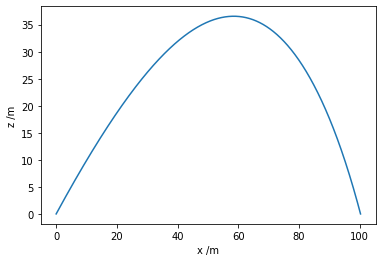

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/wwwsh/OneDrive/Рабочий стол/Documents/SuperSHOT/trajectory.obj'

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Drag coefficient, projectile radius (m), area (m2) and mass (kg).
c = 0.47            # drag coefficent -> An average golf ball will have a drag coefficient of, 0.24 < CD < 0.7
r = 0.02135         # radius diameter(m) = 42.7mm --> r=d/2 convert to meter = 0.02135
A = np.pi * r**2    # area
m = 0.04593         # mass(kg), golf_ball = 45.93 grams

# Air density (kg.m-3), acceleration due to gravity (m.s-2).
rho_air = 1.28
g = 9.81

# For convenience, define  this constant.
k = 0.5 * c * rho_air * A

# Initial speed and launch angle (from the horizontal).
v0 = 50
phi0 = np.radians(45.9)

def deriv(t, u):
    x, xdot, z, zdot = u
    speed = np.hypot(xdot, zdot)
    xdotdot = -k/m * speed * xdot
    zdotdot = -k/m * speed * zdot - g
    return xdot, xdotdot, zdot, zdotdot

# Initial conditions: x0, v0_x, z0, v0_z.
u0 = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)

# Integrate up to tf unless we hit the target sooner.
t0, tf = 0, 50

def hit_target(t, u):
    # We've hit the target if the z-coordinate is 0.
    return u[2]

# Stop the integration when we hit the target.
hit_target.terminal = True

# We must be moving downwards (don't stop before we begin moving upwards!)
hit_target.direction = -1

def max_height(t, u):
    # The maximum height is obtained when the z-velocity is zero.
    return u[3]

soln = solve_ivp(deriv, (t0, tf), u0, dense_output=True,
                 events=(hit_target, max_height))

print(soln)
print('Time to target = {:.2f} s'.format(soln.t_events[0][0]))
print('Time to highest point = {:.2f} s'.format(soln.t_events[1][0]))

# A fine grid of time points from 0 until impact time.
t = np.linspace(0, soln.t_events[0][0], 1000)

# Retrieve the solution for the time grid and plot the trajectory.
sol = soln.sol(t)
x, z = sol[0], sol[2]
print('Range to target, xmax = {:.2f} m'.format(x[-1]))
print('Maximum height, zmax = {:.2f} m'.format(max(z)))

plt.plot(x, z)
plt.xlabel('x /m')
plt.ylabel('z /m')
plt.show()

# creating .obj (3D) file...
f = open("C:/Users/wwwsh/OneDrive/Рабочий стол/Documents/SuperSHOT/trajectory.obj", "w")
for i in range(x.shape[0]):
    f.write(f"v {x[i]} 0 {z[i]}\n")
f.close()

In [51]:
from PIL import Image, ImageDraw, ImageFont

x1,y1,x2,y2, xy = 100, 1000, 1000, 100, 300

# get an image
with Image.open("/Users/jakhon37/pyProjects/3dRotation/data/res/im2_test.jpg").convert("RGBA") as im:
# /Users/jakhon37/pyProjects/3dRotation/data/res
    # make a blank image for the text, initialized to transparent text color
    txt = Image.new("RGBA", im.size, (255, 255, 255, 0))

    # get a font
    fnt = ImageFont.truetype("/Users/jakhon37/pyProjects/3dRotation/data/res/font/Amble-Bold.ttf", 40)
    # get a drawing context
    d = ImageDraw.Draw(txt)
#     shape = [(40, 40), (w - 10, h - 10)]
    shape = [(40, 40), (145, 145)]

    # draw text, half opacity
    d.text((10, 10), "Hello", font=fnt, fill=(255, 255, 255, 128))
    # draw text, full opacity
    d.text((10, 60), "World", font=fnt, fill=(255, 255, 255, 255))
#     d.line((x1,y1,x2,y2), fill=(55, 155, 255, 228), width=50 )
    d.rectangle(((x1,y1),(x2,y2)), outline = (55, 155, 255, 128), fill=(255, 255, 255, 128), width=10 )
#     d.arc((x1,y1,x2,y2), (10),(115), fill="pink", width=200)
#     d.arc(shape, start = 45, end = 135, fill ="pink", width=200)

    out = Image.alpha_composite(im, txt)
    
    out.show()

In [ ]:
def draw_line():
    addLine = ImageDraw.Draw(base)
    addLine.line((x1,y1,x2,y2), fill=(0,255))

In [35]:
# importing image object from PIL
import math
from PIL import Image, ImageDraw
w, h = 220, 190
shape = [(40, 40), (w - 10, h - 10)]
# creating new Image object
img = Image.new("RGB", (w, h))
# create rectangle image
img1 = ImageDraw.Draw(img)
img1.arc(shape, start = 20, end = 130, fill ="pink")
img.show()

In [ ]:
from PIL import Image, ImageFont, ImageDraw

from supershot.aws_proc_drive import *

import os
import copy


# 폰트 모양, 사이즈 결정
def define_fnt(size):
    fnt = ImageFont.truetype(
        "./supershot/font/Pretendard-Regular.ttf",
        size, encoding="utf-8"
    )
    return fnt


def draw_rect(frame, s_point, f_point, color, thickness):
    overlay = frame.copy()
    x, y, w, h = 1080-410, 15, 405, 550   
    cv2.rectangle(overlay, (x, y), (x+w, y+h), (100, 200, 0), -1)  
    alpha = 0.4  # Transparency factor.
    frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)
    return frame 
def draw_line(frame, s_point, e_point, color, thickness):
#     cv2.line(im, start_point, end_pointl, color=(255, 50, 50 ), thickness=3)
    draw.line([(x1,y1),(x2,y2)],fill = (255, 255, 255, 0))


# 화면 내 문구 출력
def text_define(frame, text, x, y):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_pil = Image.fromarray(frame)
    frame_draw = ImageDraw.Draw(frame_pil)
    frame_draw.text((x, y), text, font=define_fnt(32), fill=(25, 255, 255))
    frame = np.array(frame_pil)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    return frame

def put_text(frame, data, f_v, f_a):
    f_d, f_h, f_t = calc_trajectory(f_v, f_a, 0.001)
    frame = text_define(frame, str(data["shot"]), frame.shape[1] - 200, 30)
    frame = text_define(frame, "D: " + str(f_d) + " m", frame.shape[1] - 200, 80)
    frame = text_define(frame, "S: " + str(f_v) + " m/s", frame.shape[1] - 200, 130)
    frame = text_define(frame, "A: " + str(f_a) + " º", frame.shape[1] - 200, 180)
    frame = text_define(frame, str(data["line_orb"]), frame.shape[1] - 200, 230)
    frame = text_define(frame, "H: " + str(f_h) + " m", frame.shape[1] - 200, 280)
    frame = text_define(frame, "T: " + str(f_t) + " sec", frame.shape[1] - 200, 330)
    return frame

def main(im_path):
    
    im = cv2.imread(im_path)
    im_shape = im.shape
    print('image shape ',im_shape)

    if not os.path.exists(path):
        os.makedirs(path)
    im_name = (f'{path.split("/")[-1].split(".")[1]}out.jpg')
    im = cv2.imread(im_name)
    cv2.imwrite((f'{path}out{json_f["image_id"]}'), im)

print('')

In [ ]:
from PIL import Image, ImageFont, ImageDraw

from supershot.aws_proc_drive import *

import os
import copy


# 폰트 모양, 사이즈 결정
def define_fnt(size):
    fnt = ImageFont.truetype(
        "./supershot/font/Pretendard-Regular.ttf",
        size, encoding="utf-8"
    )
    return fnt


def draw_rect(frame, s_point, f_point, color, thickness):
    overlay = frame.copy()
    x, y, w, h = 1080-410, 15, 405, 550   
    # A filled rectangle
    cv2.rectangle(overlay, (x, y), (x+w, y+h), (100, 200, 0), -1)  
    
    alpha = 0.4  # Transparency factor.
    
    # Following line overlays transparent rectangle
    # over the image
    frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

    # frame = cv2.rectangle(frame, s_point, f_point, color, thickness) 
    return frame 

# 화면 내 문구 출력
def text_define(frame, text, x, y):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_pil = Image.fromarray(frame)
    
    frame_draw = ImageDraw.Draw(frame_pil)
    
    frame_draw.text((x, y), text, font=define_fnt(32), fill=(25, 255, 255))

    frame = np.array(frame_pil)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    return frame
# def put_text(frame, data, f_v, f_a):
#     f_d, f_h, f_t = calc_trajectory(f_v, f_a, 0.001)
#     frame = text_define(frame, str(data["shot"]), frame.shape[1] - 200, 30)
#     frame = text_define(frame, "D: " + str(f_d) + " m", frame.shape[1] - 200, 80)
#     frame = text_define(frame, "S: " + str(f_v) + " m/s", frame.shape[1] - 200, 130)
#     frame = text_define(frame, "A: " + str(f_a) + " º", frame.shape[1] - 200, 180)
#     frame = text_define(frame, str(data["line_orb"]), frame.shape[1] - 200, 230)
#     frame = text_define(frame, "H: " + str(f_h) + " m", frame.shape[1] - 200, 280)
#     frame = text_define(frame, "T: " + str(f_t) + " sec", frame.shape[1] - 200, 330)
#     return frame

# 출력 할 문구 지정
def put_text(frame, data, f_v, f_a):
    
#     # f_d, f_h, f_t = calc_trajectory(f_v, f_a, 0.001)
    frame = text_define(frame, ("dm1: " + str("ball_info_dm")), frame.shape[1] - 200, 30)
    # frame = text_define(frame, "dm3: " + str(data2["ball_info_dm"][2]), frame.shape[1] - 200, 130)
    # frame = text_define(frame, "dm4: " + str(data2["ball_info_dm"][3]), frame.shape[1] - 200, 180)
    # frame = text_define(frame, "dm dif1: " + str(data2["ball_info_dm_dif"][0]), frame.shape[1] - 200, 230)
    # frame = text_define(frame, "dm dif2: " + str(data2["ball_info_dm_dif"][1]), frame.shape[1] - 200, 280)
    # frame = text_define(frame, "dm dif3: " + str(data2["ball_info_dm_dif"][2]), frame.shape[1] - 200, 330)
    # frame = text_define(frame, "S2: " + str(data2["ball_info"][0]) + " m/s", frame.shape[1] - 200, 380)
    # frame = text_define(frame, "A2: " + str(data2["ball_info"][1]) + " º", frame.shape[1] - 200, 430)
    # frame = text_define(frame, "S3: " + str(data2["ball_info"][4]) + " m/s", frame.shape[1] - 200, 480)
    # frame = text_define(frame, "A3: " + str(data2["ball_info"][5]) + " º", frame.shape[1] - 200, 530)
    
    # frame = text_define(frame, "dist1: " + str(data2["ball_info_dist"][0]), frame.shape[1] - 400, 30)
    # frame = text_define(frame, "dist2: " + str(data2["ball_info_dist"][1]), frame.shape[1] - 400, 80)
    # frame = text_define(frame, "dist3: " + str(data2["ball_info_dist"][2]), frame.shape[1] - 400, 130)
    # frame = text_define(frame, "ds dif1: " + str(data2["ball_info_dist_dif"][0]), frame.shape[1] - 400, 180)
    # frame = text_define(frame, "ds dif2: " + str(data2["ball_info_dist_dif"][1]), frame.shape[1] - 400, 230)
    # frame = text_define(frame, "S1: " + str(data2["ball_info"][5]) + " m/s", frame.shape[1] - 400, 280)
    # frame = text_define(frame, "A1: " + str(data2["ball_info"][4]) + " º", frame.shape[1] - 400, 330)
    # frame = text_define(frame, "S2: " + str(data2["ball_info"][0]) + " m/s", frame.shape[1] - 400, 380)
    # frame = text_define(frame, "A2: " + str(data2["ball_info"][1]) + " º", frame.shape[1] - 400, 430)
    # frame = text_define(frame, "S2_2: " + str(data2["ball_info"][2]) + " m/s", frame.shape[1] - 400, 480)
    # frame = text_define(frame, "A2_2: " + str(data2["ball_info"][3]) + " º", frame.shape[1] - 400, 530)
    
    return frame

# def put_text(frame, data, f_v, f_a):
#     f_d, f_h, f_t = calc_trajectory(f_v, f_a, 0.001)
#     frame = text_define(frame, str(data["shot"]), frame.shape[1] - 200, 30)
#     frame = text_define(frame, "D: " + str(f_d) + " m", frame.shape[1] - 200, 80)
#     frame = text_define(frame, "S: " + str(f_v) + " m/s", frame.shape[1] - 200, 130)
#     frame = text_define(frame, "A: " + str(f_a) + " º", frame.shape[1] - 200, 180)
#     frame = text_define(frame, str(data["line_orb"]), frame.shape[1] - 200, 230)
#     frame = text_define(frame, "H: " + str(f_h) + " m", frame.shape[1] - 200, 280)
#     frame = text_define(frame, "T: " + str(f_t) + " sec", frame.shape[1] - 200, 330)
#     return frame

# main
def drawing_drive(json_data, out_path):
    if json_data["status"] == 2:  # proc 에서 오류 발생 시 draw 를 수행하지 않는다
        return "FAIL"
    # print('len displey info', len(data2["ball_info"]), len(data2["ball_info_dm"]), len(data2["ball_info_dm_dif"]), len(data2["ball_info_dist"]), len(data2["ball_info_dist_dif"]))

    results_json = {}
    n =1
    file_str = "./supershot/uploads/datasets/"
    file_strout = "./supershot/uploads/outimg/"
    file_path = file_str + json_data["file_name"]
    file = (file_path.split("-")[0]).split("/")[-1] + "." + file_path.split(".")[-1]
    file_strout = (f"./supershot/uploads/{n}out{file.split('.')[0][0:5]}/") #file_strout = (f"./uploads/outimg/")  # {file.split('.')[-2]}
    if os.path.isdir(file_strout) == False:
        os.makedirs(file_strout, exist_ok=True)
    elif os.path.isdir(file_strout) == True:
        file_strout = (f"./supershot/uploads/{int(file_strout.split('/')[-2][:1])+1}out{file.split('.')[0][0:5]}/") #file_strout = (f"./uploads/{file_strout.split('/')[-1][0]}outimg{file}/")
        os.makedirs(file_strout, exist_ok=True)
        
    # cv2.imwrite((file_strout + "image__{}.jpg".format(k)), frame)  # Save image localy 
    
                            
    
    print(f"{file} is drawing ...")    # print("data 2 ", vv)
    vidcap = cv2.VideoCapture(file_str + file_path.split("/")[-1])
    
    fourcc, w, h, fps, total_frame = make_video_writer(vidcap)
    print(fourcc, w, h, fps, total_frame)
    out = cv2.VideoWriter(
        out_path + file.split(".")[-2] + "_result.mp4", fourcc, fps, (w, h)
    )
    


    
    RGB = np.random.randint(0, 256, size=3)  # 0~255 의 숫자 3개를 랜덤하게 가져옴
    
    
    idx = 0

    img_num = 1
    # print('whike video is on the go')
    while vidcap.isOpened():
        ret, frame = vidcap.read()
        frame = cv2.flip(frame, -1)
        #CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
        cur_frame = int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))

        # print('cir frame ', cur_frame)
        
        if ret is True:  # 영상이 제대로 열린 경우
            for k in json_data["frame"]:

                    
                elif k == str(cur_frame) and int(k) >= int(json_data["init_ball_position"]):  # after the moment the ball is caught 공이 잡힌 순간 이후
                    # print('k ekif', k)
                    try:
                        last_center = json_data["frame"][str(json_data["last_center"])]["center"]  # 공이 마지막으로 잡힌 프레임의 좌표
                        center_x = json_data["frame"][k]["center"][0]  # x 좌표
                        center_y = json_data["frame"][k]["center"][1]  # y 좌표
                        

                        center_list.append([center_x, center_y])
                        # dist_info.append([width, height, dm, dm_list])
                        # dist_list.append([ dm_list])
                    except IndexError:
                        frame = draw_rect(frame, s_point=(10,10), f_point=(50,50), color= "white", thickness=-1)
                        frame = put_text(frame, json_data, f_v, f_a)
                        frame = draw_water_mark(frame)

                        pass
                     
                    
                           
                    if k == str(cur_frame) and int(k) < int(json_data["last_center"]):  # earlier than the last moment caught 마지막으로 잡힌 순간보다 이전

                        frame = draw_rect(frame, s_point=(10,10), f_point=(50,50), color= "white", thickness=-1)
                        frame = draw_water_mark(frame)
                        frame = put_text(frame, json_data, f_v, f_a)

                        center_list, frame = draw_polylines(frame, coords_list=center_list, RGB=RGB)
                        # CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
                        # (f"{out_path}/{file.split('.')[-2]}_thumbnail.png", thumb_frame)
                        
                            
                        cv2.imwrite((file_strout + "image_{}.jpg".format(img_num)), frame)  # Save image localy 
                        img_num+=1
                        out.write(frame)
                    
                    elif k == str(cur_frame) and int(k) >= int(json_data["last_center"]):
                        if int(k) == int(json_data["last_center"]):
                            if os.path.isfile("f{out_path}/{file.split('.')[-2]}_thumbnail.png"):
                                pass
                            else:
                                thumb_frame = copy.copy(frame)
                                thumb_frame = draw_rect(thumb_frame, s_point=(10,10), f_point=(50,50), color= "white", thickness=-1)
                                thumb_frame = cap_thumnail(thumb_frame)
                                thumb_frame = draw_water_mark(thumb_frame)
                                thumb_frame = put_text(thumb_frame, json_data, f_v, f_a)

                                _, thumb_frame = draw_polylines(thumb_frame, center_list, RGB)
                                cv2.imwrite(f"{out_path}/{file.split('.')[-2]}_thumbnail.png", thumb_frame)
                                json_data["thumbnail"] = f"{out_path}/{file.split('.')[-2]}_thumbnail.png"
                                print('drawing polilyne')
                        parabola_idx = int(len(json_data["parabola"]) / fps / 2)  # 포물선 그려주는 속도
                        
                        if len(last_center) != 0:
                            last_center = np.array([last_center])
                            if parabola_param == 0:
                                parabola = np.array(parabola)
                                parabola = last_center + (parabola - parabola[0])
                                parabola_param += 1
                                
                            else:
                                parabola = np.array(parabola)
                                
                        if type(parabola) != np.array:  # parabola 의 타입이 numpy 가 아니면
                            parabola = np.array(parabola)
                        
                        
                        #center_list = [(832.5, 1563.5), (833.5, 1560.5), (837.5, 1558.5), (841.0, 1558.0), (840.5, 1556.5), (837.0, 1555.0), (832.5, 1553.5), (831.5, 1554.0), (835.0, 1555.5), (835.0, 1555.5), (829.5, 1553.5), (824.5, 1551.0), (821.5, 1552.0), (822.5, 1552.0), (822.0, 1551.5), (819.5, 1551.5), (818.0, 1552.5), (819.0, 1553.5), (821.0, 1553.5), (820.0, 1549.0), (818.5, 1547.0), (813.0, 1545.0), (810.5, 1544.0), (812.0, 1542.5), (809.0, 1529.5), (810.0, 1528.0), (809.5, 1526.5), (810.5, 1525.5), (814.5, 1525.0), (813.0, 1522.5), (810.5, 1521.5), (812.5, 1522.0), (820.0, 1522.0), (823.0, 1520.0), (818.5, 1516.5), (815.0, 1516.0), (816.0, 1521.0), (818.5, 1524.0), (819.5, 1524.5), (819.5, 1525.0), (822.5, 1526.0), (824.5, 1528.5), (823.5, 1532.5), (823.0, 1535.5), (826.5, 1540.5), (825.5, 1540.5), (825.0, 1540.0), (825.5, 1541.5), (826.5, 1540.5), (825.0, 1538.5), (820.5, 1537.0), (816.0, 1538.0), (814.5, 1543.0), (814.5, 1546.0), (814.5, 1547.0), (812.0, 1544.0), (809.0, 1543.5), (810.0, 1548.5), (809.5, 1556.0), (808.0, 1564.0), (807.0, 1569.0), (810.0, 1572.0), (811.5, 1573.0), (809.0, 1571.5), (808.5, 1571.5), (811.0, 1573.5), (814.0, 1574.5), (816.0, 1575.5), (816.5, 1575.5), (812.0, 1577.5), (810.0, 1578.5), (810.5, 1580.5), (809.0, 1582.0), (810.5, 1586.0), (808.0, 1587.5), (802.5, 1588.5), (797.0, 1590.0), (797.5, 1593.0), (796.5, 1594.5), (791.0, 1593.0), (786.0, 1590.5), (780.5, 1590.0), (779.5, 1590.0), (777.0, 1591.0), (774.5, 1592.0), (773.0, 1593.5), (772.0, 1594.0), (774.0, 1594.0), (776.0, 1593.0), (776.5, 1590.0), (776.5, 1588.0), (776.5, 1586.0), (777.0, 1585.5), (777.0, 1582.5), (778.0, 1582.0), (779.5, 1583.5), (780.0, 1585.5), (781.5, 1584.0), (783.5, 1582.0), (784.5, 1579.0), (785.0, 1577.5), (790.0, 1578.0), (792.0, 1579.0), (796.5, 1581.0), (800.5, 1581.0), (805.5, 1579.0), (808.5, 1577.0), (808.0, 1576.0), (806.5, 1576.0), (804.0, 1574.0), (803.5, 1573.5), (805.0, 1575.0), (806.0, 1578.0), (805.0, 1581.5), (802.0, 1584.0), (800.0, 1584.5), (795.5, 1586.5), (796.0, 1589.0), (796.5, 1587.0), (794.5, 1584.5), (792.0, 1581.0), (795.0, 1579.5), (797.0, 1578.5), (795.0, 1577.5), (794.0, 1578.5), (792.5, 1581.5), (792.5, 1586.0), (796.0, 1591.5), (797.5, 1594.5), (799.0, 1598.0), (801.5, 1602.0), (804.0, 1603.5), (802.5, 1601.0), (806.0, 1601.5), (807.5, 1599.0), (806.0, 1596.5), (807.5, 1594.5), (812.0, 1592.0), (811.5, 1590.0), (810.5, 1588.5), (810.5, 1588.0), (811.0, 1587.5), (813.5, 1586.0), (812.5, 1582.5), (812.0, 1580.0), (814.5, 1581.5), (817.5, 1585.5), (816.5, 1587.0), (816.0, 1588.5), (816.5, 1590.5), (815.5, 1588.5), (814.5, 1588.5), (812.0, 1587.5), (809.5, 1585.5), (806.5, 1587.0), (806.0, 1588.0), (807.5, 1590.5), (806.5, 1593.0), (806.0, 1594.0), (807.0, 1594.5), (808.5, 1594.5), (810.5, 1597.5), (810.0, 1603.0), (809.5, 1610.0), (807.0, 1616.0), (807.0, 1620.0), (807.5, 1620.0), (810.0, 1622.5), (813.5, 1623.0), (812.0, 1621.5), (808.5, 1619.5), (810.0, 1618.5), (798.5, 1492.5), (778.0, 1301.0), (756.0, 1127.0), (738.5, 994.0), (729.0, 896.0), (720.0, 818.0), (712.5, 756.5), (708.5, 708.5), (705.5, 666.0), (706.0, 631.0), (708.5, 600.5), (704.5, 573.0), (701.5, 552.5), (702.0, 531.5), (704.5, 518.0), (705.0, 506.5), (700.0, 494.0), (697.5, 485.5), (697.0, 480.0), (696.0, 477.0), (694.0, 473.5), (693.0, 469.0), (691.0, 467.0), (687.5, 465.5), (688.0, 463.5), (686.0, 452.5), (686.5, 455.0), (685.5, 451.5), (690.0, 451.0), (692.5, 454.0), (696.0, 456.5), (697.0, 457.0), (708.0, 470.5), (712.5, 478.5), (718.0, 535.0), (721.0, 562.0), (727.5, 619.5), (733.0, 659.5)]
                        frame = draw_rect(frame, s_point=(10,10), f_point=(50,50), color= "white", thickness=-1)
                        _, frame = draw_polylines(frame, coords_list=center_list, RGB=RGB)
                        frame = put_text(frame, json_data, f_v, f_a)

                        frame = cv2.polylines(
                            frame, [parabola[:parabola_idx+idx]],
                            isClosed=False, color=(int(RGB[2]), int(RGB[1]), int(RGB[0])),
                            thickness=10
                        )
                        
                        parabola = np.ndarray.tolist(parabola)
                        
                        idx += parabola_idx
                        # frame = cv2.flip(frame, -1)
                        # Save frames using cv2.imwrite
                        # cv2.imwrite((file_strout + "image_{}.jpg".format(img_num)), frame)  # Save image localy 
                        # img_num+=1
                        # IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
                        out.write(frame)
                
            if cur_frame % 100 == 0:
                print(f"{cur_frame} / {total_frame} ({round(cur_frame/total_frame * 100)} %)")
            
            elif cur_frame+1 == total_frame:
                print(f"{cur_frame+1} / {total_frame} (100 %)")
                
            elif cur_frame == 1:
                print(f"0 / {total_frame} (0 %)")
        else:
            break
        
    results_json["docId"] = json_data["docId"]
    results_json["videoFile"] = file.split(".")[-2] + "_result.mp4"
    results_json["jsonFile"] = file.split(".")[-2] + ".json"
    results_json["thumbNail"] = file.split(".")[-2] + "_thumbnail.png"
    results_json["playTime"] = f"{round(total_frame / fps, 2)}"
    results_json["userBallTraceCheck"] = json_data["line_orb"]
    
    print(f"{file} drawing done")
    
    return results_json
